<a href="https://colab.research.google.com/github/MatornenSinera/BDA-2ndSemester/blob/master/Boston_HousePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
!pip install neupy

In [0]:

# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn import datasets

dataset = datasets.load_boston()
data, target = dataset.data, dataset.target



Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's
        
        
Let's print some rows, to visualize this dataset:

In [190]:
def Viz(display):
  df = pd.DataFrame(data=display['data'], columns=display['feature_names'])
  df['MEDV'] = display['target']
  y = df['MEDV'].copy()
  del df['MEDV']
  df = pd.concat((y, df), axis=1)
  return df
  
Viz(dataset).head()


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#**PREPROCESSING**

There are 13 continuous attributes (including “class” attribute “MEDV”) and 1 binary-valued attribute. There are no columns that have multiple categories, which simplifies initial data processing..

From the table above you can notice that every column has values in different scales. It might slow down or completely break networks convergence. In order to fix this issue, we should normalize values in every column. One of the simplest way to do it is to map every value into range between 0 and 1, where maximum value in every column will be equal to 1 and the smallest one - to 0.

In [191]:
from sklearn import preprocessing

data_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

data = data_scaler.fit_transform(data)
target = target_scaler.fit_transform(target.reshape(-1, 1))

dataset.data=data
dataset.target=target

Viz(dataset).head()


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.422222,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.368889,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.660000,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.631111,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.693333,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338



#Implementation: Shuffle and Split Data

Next step that implementation requires is splitting the Boston housing dataset into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

    Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
        Split the data into 80% training and 20% testing.
        Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
    Assign the train and testing splits to X_train, X_test, y_train, and y_test.



In [0]:
from sklearn.model_selection import train_test_split
from neupy import utils

# Make sure that split between train and
# validation datasets will be reproducible
utils.reproducible()

x_train, x_test, y_train, y_test = train_test_split(
    # 85% of the data we will use for training
    # and the other 15% will be used for validation
    data, target, test_size=0.2
)

In [0]:
from neupy.layers import *

# Number of features that we want
# to use during the training
n_inputs = 13

# Number of outputs in the network. For the house price
# forecasting we want to predict single value per every
# input sample.
n_outputs = 1

network = join(
    # This layer doesn't do any computation. It just
    # defines how many inputs network should expect.
    Input(n_inputs),

    # Hidden layer. Number of neurons can be adjusted
    # in order to improve performance or deal with overfitting
    Sigmoid(50),

    # Sigmoid outputs values between 0 and 1 and all
    # the prices that we want to predict has been rescaled
    # to the same range.
    Sigmoid(n_outputs),
)

In [194]:
from neupy import algorithms

optimizer = algorithms.LevenbergMarquardt(
    # First argument has to be neural network
    network,

    # With this option enabled network shows its configuration
    # before the training and its progress during the training
    verbose=True,

    # In order to avoid showing information about
    # network training progress after every epoch we can
    # do it less frequently, for example, every 5th epoch.
    show_epoch=5,
)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.01
[OPTION] mu_update_factor = 1.2
[OPTION] show_epoch = 5
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/sigmoid-38:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.97 seconds


#1 : [752 ms] train: 0.083033, valid: 0.040856


#5 : [110 ms] train: 0.009286, valid: 0.013500


#10 : [109 ms] train: 0.005586, valid: 0.009535


#15 : [118 ms] train: 0.004214, valid: 0.007938


#20 : [111 ms] train: 0.003001, valid: 0.008084


#25 : [110 ms] train: 0.002492, valid: 0.007662


#30 : [108 ms] train: 0.001988, valid: 0.008319


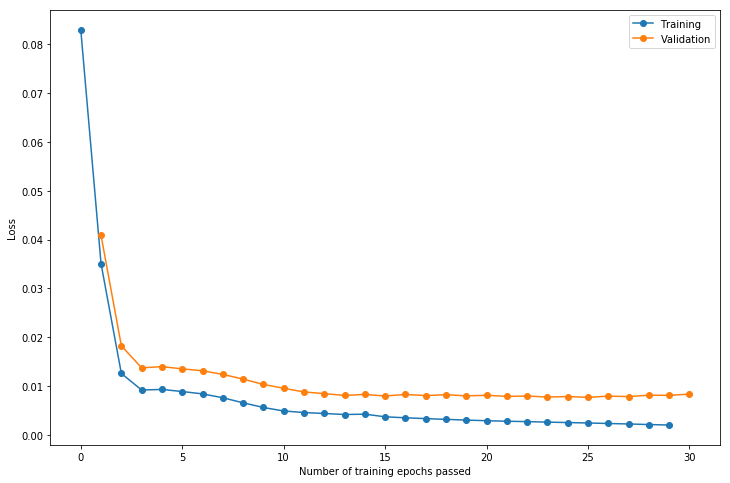

In [195]:
optimizer.train(x_train, y_train, x_test, y_test, epochs=30)
optimizer.plot_errors()

In [241]:
import numpy as np

dataset = datasets.load_boston()
data, target = dataset.data, dataset.target
data_scaler = preprocessing.MinMaxScaler()
data=np.vstack((data, [[0.127, 0.0, 2.41, 0, 0.135, 7.350, 40, 3.11, 1, 210, 11, 373, 6.78],[0.107, 1.0, 3.88, 0, 0.245, 6.350, 70, 1.53, 4, 250, 19, 343, 6.78]]))
print(data)
data = data_scaler.fit_transform(data)
print(data)
print(data[-1])
y_predict = network.predict(data[-2:]).round(1)

y_predict = target_scaler.inverse_transform(y_predict)
print(y_predict)  

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]
 [1.2700e-01 0.0000e+00 2.4100e+00 ... 1.1000e+01 3.7300e+02 6.7800e+00]
 [1.0700e-01 1.0000e+00 3.8800e+00 ... 1.9000e+01 3.4300e+02 6.7800e+00]]
[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 3.90909091e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 6.18181818e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 6.18181818e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 9.09090909e-01
  1.00000000e+00 1.69701987e-01]
 [1.35641410e-03 0.00000000e+00 7.14809384e-02 ... 0.00000000e+00
  9.39734732e-01 1.39348786e-01]
 [1.13161893e-03 1.00000000e-02 1.25366569e-01 ... 7.272